In [1]:
#  import neccessary packages 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')

In [4]:
# read the data
boston = pd.read_csv("boston.csv")

In [5]:
# preview of the data
boston.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
boston.tail()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [7]:
boston.info() # investigate null values, if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


**Variable Description**\
neighborhood &nbsp; &nbsp; &nbsp;  Name of the Boston neighborhood\
mv &nbsp; &nbsp; &nbsp; Median value of homes in thousands of 1970 dollars\
nox  &nbsp; &nbsp; &nbsp;                   Air pollution\
crim  &nbsp; &nbsp; &nbsp;                  Crime rate\
zn   &nbsp; &nbsp; &nbsp;                   Percent of land zoned for lots\
indus  &nbsp; &nbsp; &nbsp;                 Percent of business that is industrial or nonretail\
chas   &nbsp; &nbsp; &nbsp;                 On the Charles River (1) or not (0)\
rooms  &nbsp; &nbsp; &nbsp;                 Average number of rooms per home\
age    &nbsp; &nbsp; &nbsp;                 Percentage of homes built before 1940\
dis   &nbsp; &nbsp; &nbsp;                  Weighted distance to employment centers\
rad   &nbsp; &nbsp; &nbsp;                  Accessibility to radial highways\
tax   &nbsp; &nbsp; &nbsp;                  Tax rate\
ptratio   &nbsp; &nbsp; &nbsp;              Pupil/teach ratio in public schools\
lstat     &nbsp; &nbsp; &nbsp;              Percentage of population of lower socio-economic status\

**There are no non-null values. There is one object parameter i.e., Neighborhood that is not required in the current assessment and will be dropped. There are 3 parameters i.e., ‘chas’, ‘rad’, ‘ tax’ that have integer values. ‘chas’ and ‘rad’ are measures indicative of geographical position of the properties w.r.t. to the river & radial highway and its proximity is expected to play an important role in the value of the house. The 3rd integer value of ‘tax’ represents the tax rate a property is likely to incur and also expected to play a dominant role in determining the property price.**

In [8]:
# drop neighborhood variable 
boston = boston.drop(['neighborhood'],axis= 1)

In [9]:
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
# Let's create a test and train set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state = 42)

In [11]:
train_set.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
crim,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.381589
zn,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309001
indus,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.471009
chas,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.191005
nox,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.416781
rooms,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.712355
age,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340479
dis,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.233617
rad,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.389827
tax,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.462698



Histogram of Data of Boston DataFrame:


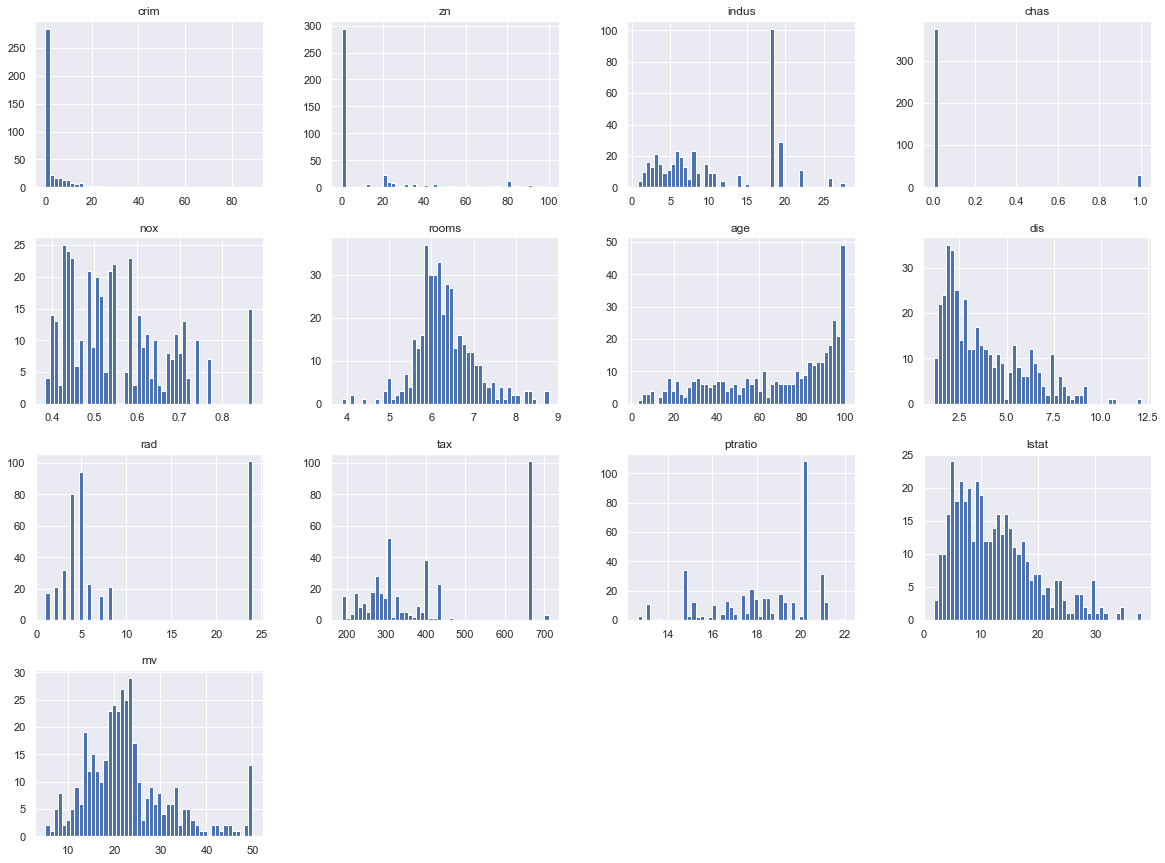

In [12]:
# histogram of data
print('\nHistogram of Data of Boston DataFrame:')
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
#### by transforming features logarithmically and polynomially does it give us better predictors?

In [13]:
train_set['logAge'] = np.log10(train_set['age'])
train_set['logLstat'] = np.log10(train_set['lstat'])
train_set['logDis']= np.log10(train_set['dis'])
train_set['logMv'] = np.log10(train_set['mv'])
train_set['sqAge'] = np.square(train_set['age'])
train_set['sqLstat'] = np.square(train_set['lstat'])
train_set['sqDis'] = np.square(train_set['dis'])

C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [14]:
train_set.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
crim,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.381589,0.275269,0.372532,-0.445025,-0.514660,0.361844,0.398172,-0.288052
zn,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309001,-0.525689,-0.443067,0.606355,0.331421,-0.550211,-0.318388,0.706115
indus,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.471009,0.534948,0.587353,-0.759717,-0.533247,0.670606,0.536730,-0.619169
chas,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.191005,0.098205,-0.093815,-0.119420,0.163793,0.088351,-0.060314,-0.119460
nox,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.416781,0.628373,0.575079,-0.831965,-0.502542,0.744978,0.536696,-0.671874
rooms,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.712355,-0.188589,-0.670184,0.249672,0.643921,-0.223871,-0.535569,0.155541
age,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340479,0.947223,0.568656,-0.780887,-0.423135,0.981690,0.500416,-0.681339
dis,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.233617,-0.687870,-0.476937,0.966825,0.331354,-0.755102,-0.445521,0.969567
rad,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.389827,0.370353,0.453553,-0.544004,-0.496900,0.448185,0.438240,-0.402445
tax,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.462698,0.393381,0.505188,-0.601859,-0.559916,0.504871,0.480748,-0.424721


array([[<AxesSubplot:xlabel='mv', ylabel='mv'>,
        <AxesSubplot:xlabel='logAge', ylabel='mv'>,
        <AxesSubplot:xlabel='logLstat', ylabel='mv'>,
        <AxesSubplot:xlabel='logDis', ylabel='mv'>],
       [<AxesSubplot:xlabel='mv', ylabel='logAge'>,
        <AxesSubplot:xlabel='logAge', ylabel='logAge'>,
        <AxesSubplot:xlabel='logLstat', ylabel='logAge'>,
        <AxesSubplot:xlabel='logDis', ylabel='logAge'>],
       [<AxesSubplot:xlabel='mv', ylabel='logLstat'>,
        <AxesSubplot:xlabel='logAge', ylabel='logLstat'>,
        <AxesSubplot:xlabel='logLstat', ylabel='logLstat'>,
        <AxesSubplot:xlabel='logDis', ylabel='logLstat'>],
       [<AxesSubplot:xlabel='mv', ylabel='logDis'>,
        <AxesSubplot:xlabel='logAge', ylabel='logDis'>,
        <AxesSubplot:xlabel='logLstat', ylabel='logDis'>,
        <AxesSubplot:xlabel='logDis', ylabel='logDis'>]], dtype=object)

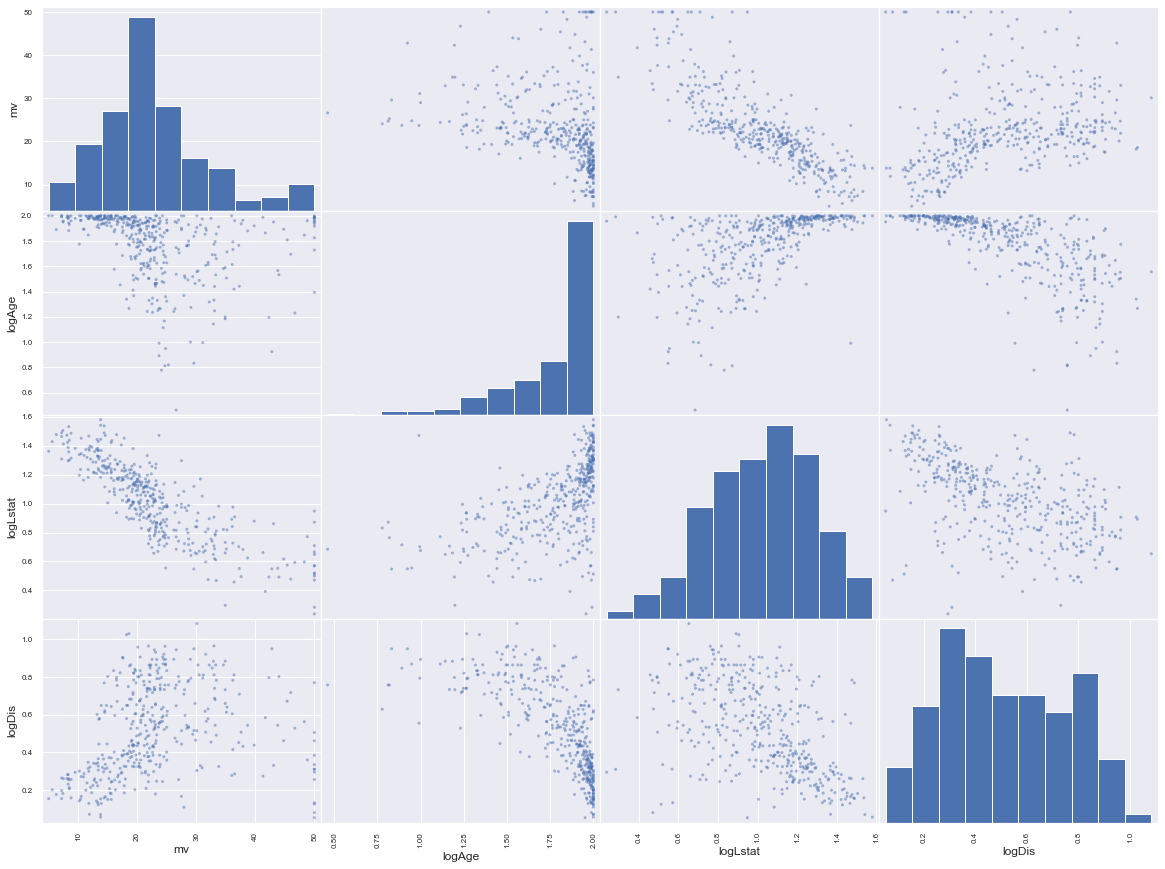

In [15]:
# let's look at how log changes have impacted the linearity of features
from pandas.plotting import scatter_matrix
scatter_matrix(train_set[['mv', 'logAge','logLstat','logDis']], figsize=(20,15))

In [16]:
# We have to decide how we are going to deal with outliers.
# Let's take a loo
def outliers(dataset,attribute):
    q1 = dataset[attribute].quantile(0.25)
    q3 = dataset[attribute].quantile(0.75)
    IQR = q3 - q1
    L_out = q1 - 1.5* IQR
    U_out = q3 + 1.5* IQR
    return L_out, U_out

In [17]:
train_outliers = outliers(train_set,'mv')

In [18]:
# look at extreme outliers
(train_set['mv'] >= train_outliers[1]) | (train_set['mv'] <= train_outliers[0])

477    False
15     False
332    False
423    False
19     False
       ...  
106    False
270    False
348    False
435    False
102    False
Name: mv, Length: 404, dtype: bool

In [19]:
# create a median variable
mv_med= train_set['mv'].median()

In [20]:
# replace all extreme outliers with the median

train_set.loc[(train_set['mv'] >= train_outliers[1]) | (train_set['mv'] <= train_outliers[0]),'mv'] =  mv_med

C:\Users\Jianglan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [21]:
train_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91,12.0,1.988113,1.396374,0.322364,1.079181,9467.29,620.5081,4.412940
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47,19.9,1.752048,0.927883,0.653077,1.298853,3192.25,71.7409,20.237402
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83,19.4,1.367356,0.893762,0.822214,1.287802,542.89,61.3089,44.098896
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29,13.4,1.929930,1.367169,0.305738,1.127105,7242.01,542.4241,4.087675
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28,18.2,1.841985,1.052309,0.579383,1.260071,4830.25,127.2384,14.413412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,18.66,19.5,1.963316,1.270912,0.344589,1.290035,8445.61,348.1956,4.888521
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,13.00,21.1,1.624282,1.113943,0.646306,1.324282,1772.41,169.0000,19.616041
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,5.99,24.5,1.472756,0.777427,0.921374,1.389166,882.09,35.8801,69.622336
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,23.27,13.4,1.975891,1.366796,0.327298,1.127105,8949.16,541.4929,4.514350


In [22]:
# no extreme outliers exist now 
(train_set['mv'] >= train_outliers[1]) | (train_set['mv'] <= train_outliers[0])

477    False
15     False
332    False
423    False
19     False
       ...  
106    False
270    False
348    False
435    False
102    False
Name: mv, Length: 404, dtype: bool

In [23]:
corr_matrix = train_set.corr()

In [24]:
# look at correlation again and visualize attributes 
corr_matrix['mv'].sort_values(ascending=False)

mv          1.000000
logMv       0.836645
rooms       0.519580
logDis      0.470785
dis         0.404733
zn          0.396503
sqDis       0.329670
chas        0.054941
logAge     -0.428386
ptratio    -0.450305
crim       -0.474918
age        -0.495594
rad        -0.513277
sqAge      -0.518774
nox        -0.560027
tax        -0.583354
indus      -0.607141
sqLstat    -0.672598
logLstat   -0.722319
lstat      -0.740004
Name: mv, dtype: float64

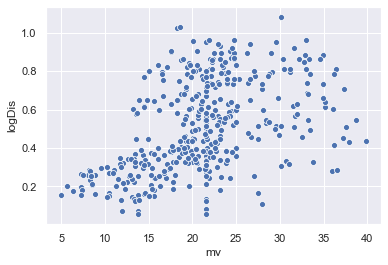

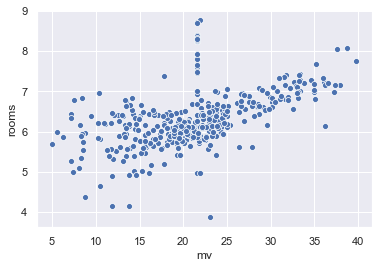

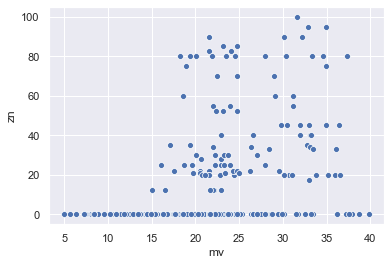

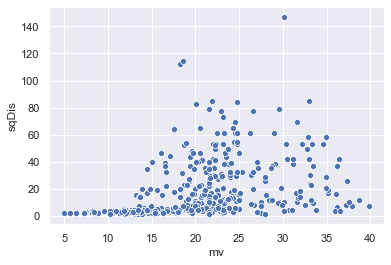

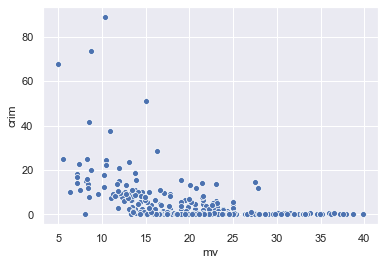

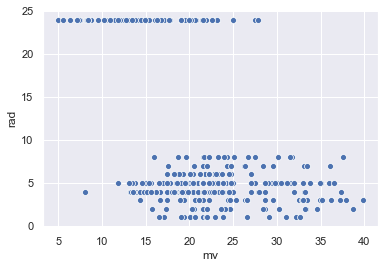

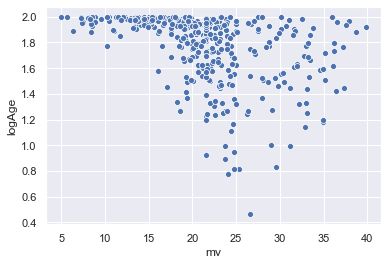

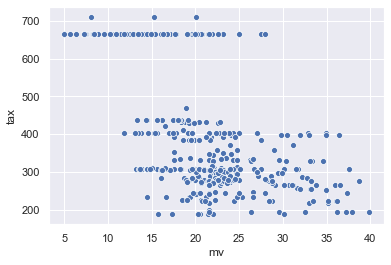

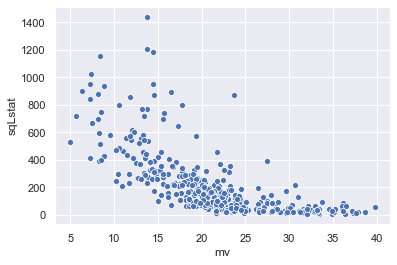

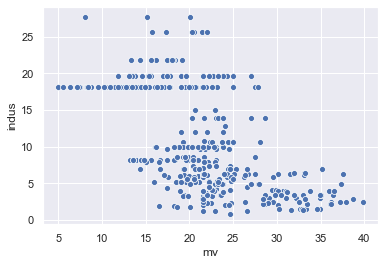

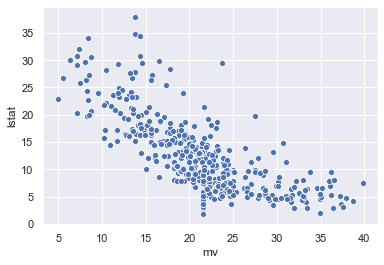

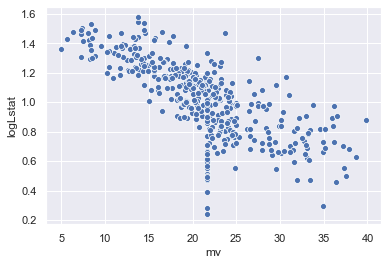

In [25]:
attributes = ['logDis', 'rooms','zn','sqDis','crim','rad',
             'logAge','tax','sqLstat','indus','lstat','logLstat']

for j in attributes:
    sns.scatterplot(x=train_set['mv'],y=train_set[j])
    plt.show()
        

In [26]:
# create a function that returns a df with only the variables of interest
def train_attributes(data,attribute_list):
    return data[attribute_list]

In [27]:
# remove labels values from df
def labels(data,label):
    return data[label]

In [28]:
# create our train predictors
train_predictors = ['logDis','rooms','logAge','lstat']
train_df = train_attributes(train_set, train_predictors)

In [29]:
# create our train label 
train_labels = labels(train_set, 'mv')
train_labels

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: mv, Length: 404, dtype: float64

In [30]:
# now we'll have to standard our features by converting them to z scores
from sklearn.preprocessing import StandardScaler 

In [31]:
scaler = StandardScaler()
scaler.fit(train_df)
train = scaler.fit_transform(train_df)

In [32]:
train

array([[-0.81554376, -1.42806858,  0.79823817,  1.75350503],
       [ 0.57861263, -0.68008655, -0.09335305, -0.5614742 ],
       [ 1.29162501, -0.40206304, -1.54629762, -0.65159505],
       ...,
       [ 1.7096461 ,  0.45035421, -1.14821054, -0.91069248],
       [-0.79474573,  0.44188648,  0.75207804,  1.52257036],
       [-0.34610337,  0.12575823,  0.58425811, -0.25731635]])

In [33]:
# create the df with standardized training features
scaled_train = pd.DataFrame(train, index=train_df.index,
                            columns=train_df.columns)

In [34]:
scaled_train

,logDis,rooms,logAge,lstat
477,-0.815544,-1.428069,0.798238,1.753505
15,0.578613,-0.680087,-0.093353,-0.561474
332,1.291625,-0.402063,-1.546298,-0.651595
423,-0.885632,-0.300450,0.578486,1.525387
19,0.267948,-0.831094,0.246327,-0.165787
...,...,...,...,...
106,-0.721853,-0.677264,0.704581,0.873419
270,0.550066,-0.649038,-0.575914,0.076412
348,1.709646,0.450354,-1.148211,-0.910692
435,-0.794746,0.441886,0.752078,1.522570


In [35]:
# let's run a linear regression on the data
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()

In [37]:
lin_reg.fit(scaled_train,train_labels)

LinearRegression()

In [38]:
# Fitted model yields 
lin_reg.intercept_,lin_reg.coef_

(21.149752475247524,
 array([ 0.40380133,  0.85091494, -0.44870445, -3.97185525]))

In [39]:
from sklearn.metrics import mean_squared_error


In [40]:
# Let's calculate the root mean squared of our training data 
training_predictions = lin_reg.predict(scaled_train)
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.410896567346878

**we have a rmse of 4.35 suggesting our predictions vary by 4.35. Let's cross validate this to make sure our prediction isn't over/ underfitting the data**

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [67]:
regr = linear_model.LinearRegression()

In [68]:
lr_scores = cross_val_score(regr, scaled_train, train_labels,
                        scoring = 'neg_mean_squared_error', cv=10)

In [72]:
lr_rmse_scores = np.sqrt(-lr_scores)

In [73]:
display(lr_rmse_scores)

array([5.67240951, 3.93723559, 4.46313453, 3.68314043, 4.96759358,
       4.71530515, 4.76757908, 4.31090942, 4.57063398, 3.51337053])

In [74]:
lr_rmse_scores.std()

0.6078447150832014

In [75]:
lr_rmse_scores.mean()

4.460131180786317

our cross validated rmse score is pretty similar, the linear regression is only performing better slightly better

when we examined correlates we saw that there may be some multicollinearity. When your multipe regression suffers from multicollinearity the least squares are unbiased, but the variances tend to be large. Looking at our first examination of the full test set we say some predictions that were pretty accurate, and others that have high variance. 

We also see large positive and negative coefficients which can be a result of correlated variables and have implications for prediction 

Implementing ridge regression can help us by imposing restrictions on our coefficient

Let's implement ridge regression on our data! We will use grid search that will allow us to automatically perform cross validation with a range of reguarlization paramters to find  optimal value of alpha 

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [77]:
ridge= Ridge()

In [78]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regression.fit(scaled_train,train_labels)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [79]:
ridge_regression.best_params_ # our best alpha score is 10

{'alpha': 10}

In [80]:
ridge_regression.best_score_ # lr seems to performn better than ridge regression

-20.239371552656127

In [81]:
ridge_reg_2 = Ridge(alpha =10, solver = 'cholesky')
ridge_reg_2.fit(scaled_train,train_labels)

Ridge(alpha=10, solver='cholesky')

In [82]:
ridge_reg_2.intercept_,ridge_reg_2.coef_

(21.149752475247524,
 array([ 0.4557909 ,  0.91941846, -0.4768009 , -3.79303618]))

In [83]:
rid= Ridge()
rid_scores = cross_val_score(rid, scaled_train, train_labels,
                        scoring = 'neg_mean_squared_error', cv=10)

In [84]:
rid_rmse_scores = np.sqrt(-rid_scores)

In [86]:
display(rid_rmse_scores)
rid_rmse_scores.mean()


array([5.67103901, 3.93501872, 4.46162207, 3.68234394, 4.96998605,
       4.71449702, 4.77061795, 4.31051928, 4.57279102, 3.50622188])

4.459465693856482

In [87]:
rid_rmse_scores.std()

0.609349370629651

**Now that we've gotten our models we can see how it performs on our testing data!**

In [88]:
test_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,21.22,17.2
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,12.86,22.5


In [89]:
# create new features
test_set['logAge'] = np.log10(test_set['age'])
test_set['logLstat'] = np.log10(test_set['lstat'])
test_set['logDis']= np.log10(test_set['dis'])
test_set['logMv'] = np.log10(test_set['mv'])
test_set['sqAge'] = np.square(test_set['age'])
test_set['sqLstat'] = np.square(test_set['lstat'])
test_set['sqDis'] = np.square(test_set['dis'])

C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jianglan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [90]:
test_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04,23.6,1.924796,0.956168,0.422639,1.372912,7072.81,81.7216,7.002904
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53,32.4,1.517196,0.547775,0.610405,1.510545,1082.41,12.4609,16.626822
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6,1.994757,1.256958,0.271400,1.133539,9761.44,326.5249,3.489798
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,22.8,0.892095,0.741939,0.723234,1.357935,60.84,30.4704,27.955541
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27,16.1,1.962843,1.237292,0.374418,1.206826,8427.24,298.2529,5.608371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,34.37,17.9,2.000000,1.536180,0.191423,1.252853,10000.00,1181.2969,2.414605
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,18.05,9.6,1.969882,1.256477,0.301594,0.982271,8704.89,325.8025,4.010407
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,21.22,17.2,2.000000,1.326745,0.183981,1.235528,10000.00,450.2884,2.333256
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,12.86,22.5,1.654177,1.109241,0.646129,1.352183,2034.01,165.3796,19.600100


*Change MV outliers*

In [91]:
test_set_outliers = outliers(test_set,'mv')
test_set_outliers

(6.074999999999996, 34.87500000000001)

In [92]:
test_set_med = test_set['mv'].median()
test_set_med

20.15

In [93]:
test_set.loc[(test_set['mv']>= test_set_outliers[1]) | (test_set['mv'] <= test_set_outliers[0]),'mv']= test_set_med

C:\Users\Jianglan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [94]:
# create our test labels
test_labels = labels(test_set,'mv')
test_labels

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: mv, Length: 102, dtype: float64

In [95]:
# create our train labels
test_df = train_attributes(test_set, train_predictors)
test_df

,logDis,rooms,logAge,lstat
173,0.422639,6.416,1.924796,9.04
274,0.610405,6.758,1.517196,3.53
491,0.271400,5.983,1.994757,18.07
72,0.723234,6.065,0.892095,5.52
452,0.374418,6.297,1.962843,17.27
...,...,...,...,...
412,0.191423,4.628,2.000000,34.37
436,0.301594,6.461,1.969882,18.05
411,0.183981,6.657,2.000000,21.22
86,0.646129,6.015,1.654177,12.86


**Standardize to z scores**

In [96]:
test = scaler.fit(test_df)
test = scaler.fit_transform(test_df)

In [97]:
scaled_test = pd.DataFrame(test, index= test_df.index, columns= test_df.columns)
scaled_test

,logDis,rooms,logAge,lstat
173,-0.424094,0.386286,0.559736,-0.608716
274,0.424429,0.904026,-0.973668,-1.373038
491,-1.107551,-0.269215,0.822931,0.643885
72,0.934311,-0.145078,-3.325317,-1.096995
452,-0.642006,0.206137,0.702869,0.532912
...,...,...,...,...
412,-1.468971,-2.320494,0.842656,2.904947
436,-0.971102,0.454410,0.729349,0.641110
411,-1.502601,0.751127,0.842656,1.080838
86,0.585870,-0.220771,-0.458342,-0.078823


In [98]:
testing_predictions_lr = lin_reg.predict(scaled_test)

In [99]:
testing_predictions_lr[0:5]

array([23.47377637, 27.9807862 , 17.54677384, 27.25276791, 18.63388435])

In [100]:
testing_predictions_lr - test_labels

173    -0.126224
274    -4.419214
491     3.946774
72      4.452768
452     2.533884
         ...    
412   -11.234096
436     8.670625
411    -0.688892
86     -0.782796
75      2.841062
Name: mv, Length: 102, dtype: float64

In [147]:
test_lr_mse = mean_squared_error(test_labels, testing_predictions_lr)
test_lr_rmse = np.sqrt(test_lr_mse)
test_lr_rmse

4.184031816256407

In [102]:
testing_predictions_ridge = ridge_reg_2.predict(scaled_test)

In [148]:
test_ridge_mse = mean_squared_error(test_labels, testing_predictions_ridge)
test_ridge_rmse = np.sqrt(test_ridge_mse)
test_ridge_rmse

4.182626572838461

In [103]:
lin_reg.intercept_,lin_reg.coef_

(21.149752475247524,
 array([ 0.40380133,  0.85091494, -0.44870445, -3.97185525]))

In [104]:
ridge_reg_2.intercept_,ridge_reg_2.coef_

(21.149752475247524,
 array([ 0.4557909 ,  0.91941846, -0.4768009 , -3.79303618]))

In [175]:
test_lr_rmse/test_labels.mean()

0.21011828332339785

In [176]:
test_ridge_rmse/test_labels.mean()

0.21004771327336066

<AxesSubplot:ylabel='mv'>

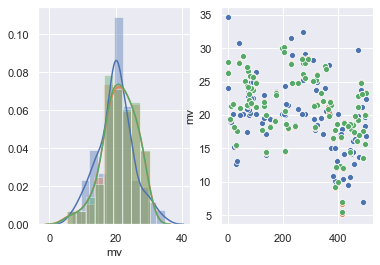

In [105]:
f, axes= plt.subplots(1,2)
sns.distplot(test_labels, ax=axes[0])
sns.distplot(testing_predictions_lr, ax=axes[0])
sns.distplot(testing_predictions_ridge, ax=axes[0])
sns.scatterplot(test_labels.index, test_labels, ax=axes[1])
sns.scatterplot(test_labels.index,testing_predictions_lr, ax=axes[1])
sns.scatterplot(test_labels.index,testing_predictions_ridge, ax=axes[1])

**what a surprise, both linear regression and ridge regrssion cannot accurately predict.**\
**We may make another try on logMV!**

In [153]:
# create our train predictors
train_predictors_log = ['rooms','logLstat','tax','indus','crim']
train_df_log = train_attributes(train_set, train_predictors_log)
train_df_log

,rooms,logLstat,tax,indus,crim
477,5.304,1.396374,666,18.10,15.02340
15,5.834,0.927883,307,8.14,0.62739
332,6.031,0.893762,304,6.06,0.03466
423,6.103,1.367169,666,18.10,7.05042
19,5.727,1.052309,307,8.14,0.72580
...,...,...,...,...,...
106,5.836,1.270912,384,8.56,0.17120
270,5.856,1.113943,223,6.96,0.29916
348,6.635,0.777427,280,2.01,0.01501
435,6.629,1.366796,666,18.10,11.16040


In [154]:
train_labels_log = labels(train_set, 'logMv')
train_labels_log

477    1.079181
15     1.298853
332    1.287802
423    1.127105
19     1.260071
         ...   
106    1.290035
270    1.324282
348    1.389166
435    1.127105
102    1.269513
Name: logMv, Length: 404, dtype: float64

In [155]:
scaler = StandardScaler()
scaler.fit(train_df_log)
train_log = scaler.fit_transform(train_df_log)
train_log

array([[-1.42806858,  1.43207192,  1.57843444,  1.03323679,  1.28770177],
       [-0.68008655, -0.36078346, -0.58464788, -0.41315956, -0.33638447],
       [-0.40206304, -0.49136285, -0.60272378, -0.71521823, -0.40325332],
       ...,
       [ 0.45035421, -0.9365625 , -0.74733095, -1.30336132, -0.40547014],
       [ 0.44188648,  1.31888303,  1.57843444,  1.03323679,  0.85189733],
       [ 0.12575823,  0.01673752, -0.12069986, -0.35216694, -0.38135592]])

In [156]:
scaled_train_log = pd.DataFrame(train_log, index=train_df_log.index,columns=train_df_log.columns)

In [157]:
from sklearn.linear_model import LinearRegression
lin_reg_log = LinearRegression()
lin_reg_log.fit(scaled_train_log,train_labels_log)
lin_reg_log.intercept_,lin_reg_log.coef_

(1.3227829913016171,
 array([ 0.0351633 , -0.10487198, -0.02470479,  0.01253913, -0.03630077]))

In [158]:
training_predictions_log = lin_reg_log.predict(scaled_train_log)
lin_mse_log = mean_squared_error(train_labels_log, training_predictions_log)
lin_rmse_log = np.sqrt(lin_mse_log)
lin_rmse_log

0.08748642999900633

In [159]:
regr_log = linear_model.LinearRegression()
scores_log = cross_val_score(regr_log, scaled_train_log, train_labels_log,
                        scoring = 'neg_mean_squared_error', cv=10)
lr_rmse_scores_log = np.sqrt(-scores_log)

In [160]:
lr_rmse_scores_log.mean()

0.08995576438772804

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge_log= Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regression_log = GridSearchCV(ridge_log, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regression_log.fit(scaled_train_log,train_labels_log)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [162]:
ridge_regression.best_params_

{'alpha': 10}

In [163]:
ridge_reg_log = Ridge(alpha =10, solver = 'cholesky')
ridge_reg_log.fit(scaled_train_log,train_labels_log)

Ridge(alpha=10, solver='cholesky')

In [164]:
ridge_reg_log.intercept_,ridge_reg_log.coef_

(1.3227829913016171,
 array([ 0.03643845, -0.10015549, -0.02422441,  0.00958464, -0.03600591]))

In [165]:
training_predictions_Ridlog = ridge_reg_log.predict(scaled_train_log)
rid_mse_log = mean_squared_error(train_labels_log, training_predictions_log)
rid_rmse_log = np.sqrt(rid_mse_log)
rid_rmse_log

0.08748642999900633

In [166]:
rid_log= Ridge()
rid_scores_log = cross_val_score(rid_log, scaled_train_log, train_labels_log,
                        scoring = 'neg_mean_squared_error', cv=10)
rid_rmse_scores_log = np.sqrt(-rid_scores_log)

In [167]:
rid_rmse_scores_log.mean()

0.08994318280494977

**Let's use test set for validation**

In [168]:
test_labels_log = labels(test_set,'logMv')
test_labels_log

173    1.372912
274    1.510545
491    1.133539
72     1.357935
452    1.206826
         ...   
412    1.252853
436    0.982271
411    1.235528
86     1.352183
75     1.330414
Name: logMv, Length: 102, dtype: float64

In [169]:
test_df_log = train_attributes(test_set, train_predictors_log)
test_df_log

,rooms,logLstat,tax,indus,crim
173,6.416,0.956168,296,4.05,0.09178
274,6.758,0.547775,254,6.41,0.05644
491,5.983,1.256958,711,27.74,0.10574
72,6.065,0.741939,305,10.81,0.09164
452,6.297,1.237292,666,18.10,5.09017
...,...,...,...,...,...
412,4.628,1.536180,666,18.10,18.81100
436,6.461,1.256477,666,18.10,14.42080
411,6.657,1.326745,666,18.10,14.05070
86,6.015,1.109241,247,4.49,0.05188


In [170]:
test_log = scaler.fit(test_df_log)
test_log = scaler.fit_transform(test_df_log)
scaled_test_log = pd.DataFrame(test_log, index= test_df_log.index, columns= test_df_log.columns)
scaled_test_log

,rooms,logLstat,tax,indus,crim
173,0.386286,-0.403634,-0.729893,-1.149219,-0.476787
274,0.904026,-1.998110,-0.967732,-0.796429,-0.481548
491,-0.269215,0.770727,1.620178,2.392130,-0.474906
72,-0.145078,-1.240042,-0.678928,-0.138686,-0.476806
452,0.206137,0.693947,1.365351,0.951075,0.196583
...,...,...,...,...,...
412,-2.320494,1.860880,1.365351,0.951075,2.045016
436,0.454410,0.768849,1.365351,0.951075,1.453580
411,0.751127,1.043195,1.365351,0.951075,1.403721
86,-0.220771,0.194001,-1.007372,-1.083444,-0.482162


In [171]:
testing_predictions_lr_log = lin_reg_log.predict(scaled_test_log)
test_lr_mse_log = mean_squared_error(test_labels_log, testing_predictions_lr_log)
test_lr_rmse_log = np.sqrt(test_lr_mse_log)
test_lr_rmse_log

0.0938047690568652

In [172]:
testing_predictions_ridge_log = ridge_reg_log.predict(scaled_test_log)
test_ridge_mse_log=mean_squared_error(test_labels_log, testing_predictions_ridge_log)
test_ridge_rmse_log = np.sqrt(test_ridge_mse_log)
test_ridge_rmse_log

0.09360712115073434

In [173]:
test_lr_rmse_log/test_labels_log.mean()

0.07223982280902136

In [174]:
test_ridge_rmse_log/test_labels_log.mean()

0.07208761253377605

<AxesSubplot:ylabel='logMv'>

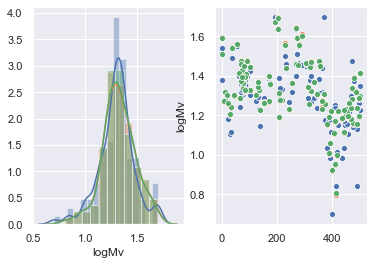

In [177]:
f, axes= plt.subplots(1,2)
sns.distplot(test_labels_log, ax=axes[0])
sns.distplot(testing_predictions_lr_log, ax=axes[0])
sns.distplot(testing_predictions_ridge_log, ax=axes[0])
sns.scatterplot(test_labels_log.index, test_labels_log, ax=axes[1])
sns.scatterplot(test_labels_log.index,testing_predictions_lr_log, ax=axes[1])
sns.scatterplot(test_labels_log.index,testing_predictions_ridge_log, ax=axes[1])